#Titanic, who sink or float?

This is the markdown cell of the titanic notebook.  
It's all good yo, so what I can do here is write here and do calculations.  
Truly the next generation scientific paper. I love it!!  

Too bad I gotta double space things otherwise it dies.  
Note in hand: no space.
single space. 
doble space.  (IT ALL GOES ON THE SAME LINE!)

That being said, let:s see what we can do with it. 

All data, code is taken from 
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
& also: https://www.kaggle.com/startupsci/titanic-data-science-solutions


In [1]:
# RUN THIS BEFORE YOU RUN ANY OF THE DATA BELOW!

#We start off with importing stuff.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Test data is in the input folder.

data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

# Yeah gimme those 3 samples from the data_train. We can also check out the test data ;)

data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C


In [2]:
#All right now that we have had some fun, let`s start off with the most important part
#How to check what sort of data you got. 

print(data_train.columns.values)

#Did you get that? First we define our data by letting pandas read the csv 
#(data_train = pd.read_csv('./input/train.csv'))
#and then we can start using data_train.columns.values on top of it.
#Check out the

#  https://www.kaggle.com/c/titanic/data  

#to see more info about our data.

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


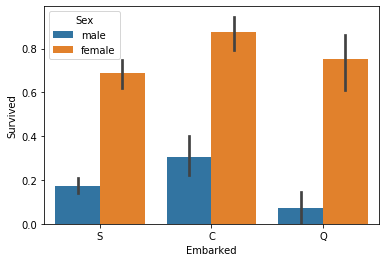

In [3]:
#That being said, let's go and see how we can VISUALIZE OUR DATA. Wow!!!!!! 
#Call out seaborn (see manual wth it does).
#We are saing that X is gonna be where they embarked (3 places, C = Cherbourg; Q = Queenstown; S = Southampton)

sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

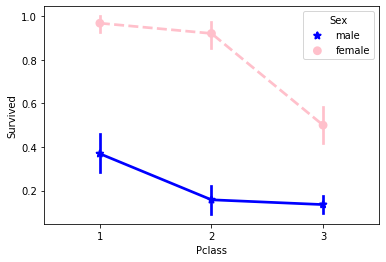

In [4]:
#NOTE: SEE MORE FROM https://seaborn.pydata.org/

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

#Once you run this, see that rich ladies happened to survive more often than others. 
#Poor people however....

## Let's data! 

OK, now we got a whole lot of data, we have peered in a little bit.  
Now let's check out what we can do to make the data a bit more... nice.  
If you run this code: 

In [5]:
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.05,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.05,NaN,S
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.10,NaN,S


You can see that it's kinda.. je ne sais quoi... so-so. For example - name is  
written as "Surname, Title. Firstname". Which would be fine, as name doesn't really  
show us much, but what about Age, Fares and Cabins?
Wouldn't it be nicer if we'd see what sort of people would survive more -  
poor boys or girls, senior rich people? etc. etc.

Let's shamelessly rip the code from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish 
from now on and see where it takes us.  

In [6]:
# First off we start off with simplifying ages by binning and naming the things.
# pd.cut says it Bin values into discrete intervals.
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

# fillna is a pandas thing. 
# It fills NaN (Not a Number) and NA (Not Available) values.
# apply... applies the thing. 

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

# Bin & Cut, baby.

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

# Formats the names and adds a new columns to this page.

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

# Removes unneeded columns.  
# Why did we lose Embarked anyway?? 
# BTW - df stands for DataFrame
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

# Here we chain all our changes into one simple thing. 

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

#And now we apply them.

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


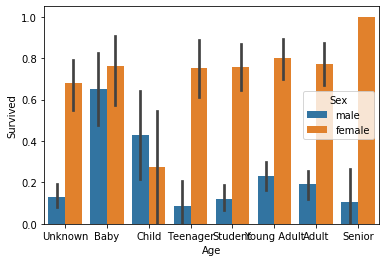

In [7]:
# Let's take a quick look what we have done. 
# Which age of a boy would've you wanted to be when the Titanic sank? 🤔 

sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

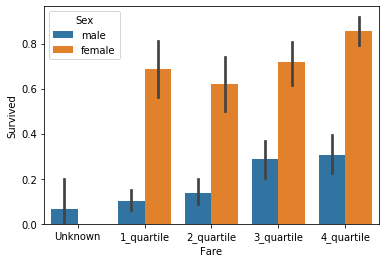

In [8]:
#Which percentile of women died the most? 🤔

sns.barplot(x="Fare", y="Survived", hue="Sex", data=data_train);

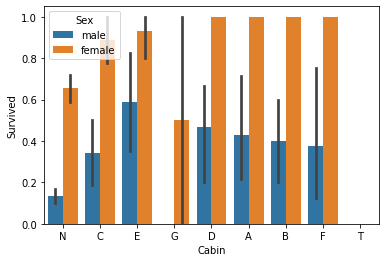

In [9]:
# Can you spot the place(s) where all women survived? 🤔

sns.barplot(x="Cabin", y="Survived", hue="Sex", data=data_train);


The last part of the preprocessing phase is to normalize labels. 
The LabelEncoder in Scikit-learn will convert each unique string value into a number, 
making out data more flexible for various algorithms.

__The result is a table of numbers that looks scary to humans, but beautiful to machines.__

In [10]:
#Yeah right! I ain't scared of no numbers.

#BTW check out https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


## Now its time for some Machine Learning.

First, separate the features(X) from the labels(y).

X_all: All features minus the value we want to predict (Survived).

y_all: Only the value we want to predict.

Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, I'm training 80% of the data, then testing against the other 20%.
Later, this data will be reorganized into a KFold pattern to validate the effectiveness of a trained algorithm

In [11]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)


## Fitting and Tuning an Algorithm

Now it's time to figure out which algorithm is going to deliver the best model. I'm going with the RandomForestClassifier, but you can drop any other classifier here, such as Support Vector Machines or Naive Bayes.


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

c:\users\pineappledreams\github\kaggle-and-friends\env\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\pineappledreams\github\kaggle-and-friends\env\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8100558659217877



## Validate with KFold

Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.



## Predict the Actual Test Data

And now for the moment of truth. Make the predictions, export the CSV file, and upload them to Kaggle.


In [15]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()
print("done")

done


Here's the most important command of your life. 

`kaggle competitions submit -c titanic -f submission.csv -m "Message"`


You will be greeted with 

`Successfully submitted to Titanic: Machine Learning from Disaster` 

Yea baby!!  

As written: You may select up to 5 submissions to be used to count towards your final leaderboard score.  

So go nuts!  



ENJOY!!!!!!